In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

from text_classification.fast_text.train import trainIters

In [2]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

/Users/2359media/anaconda/envs/botbot-nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Transform the data back to plain text

In [3]:
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
id_to_word = {value:key for key,value in word_to_id.items()}
# We actually don't need these tokens
id_to_word[0] = ""
id_to_word[1] = ""
id_to_word[2] = ""

def inverse_transform(seq):
    try:
        return ' '.join(id_to_word[id] for id in seq).strip()
    except:
        print(seq)
        return seq

In [4]:
x_train_text = [inverse_transform(item) for item in x_train]
x_test_text  = [inverse_transform(item) for item in x_test]

In [5]:
training_data = [(item, y_train[idx]) for idx, item in enumerate(x_train_text)]
classes = ['negative', 'positive']

losses, model = trainIters(training_data, 
                           classes, 
                           n_iters=5, 
                           log_every=1, 
                           verbose=1,
                           learning_rate=1e-3, 
                           batch_size=64)

Training started
Importing /Users/2359media/Documents/botbot-nlp/data/fasttext/crawl-300d-2M.vec...
4m 25s (- 17m 42s) (1 20%) 0.0086 - accuracy: 0.7486
8m 26s (- 12m 40s) (2 40%) 0.0064 - accuracy: 0.8391
12m 36s (- 8m 24s) (3 60%) 0.0058 - accuracy: 0.8546
16m 35s (- 4m 8s) (4 80%) 0.0055 - accuracy: 0.8610
20m 52s (- 0m 0s) (5 100%) 0.0054 - accuracy: 0.8643


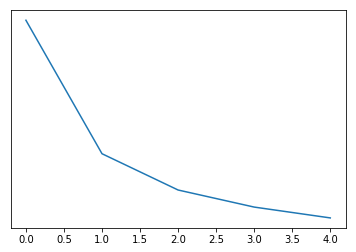

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
fig, ax = plt.subplots()
loc = ticker.MultipleLocator(base=5)
ax.yaxis.set_major_locator(loc)
plt.plot(losses)

In [7]:
from text_classification.fast_text.train import evaluate_all
test_data = [(item, y_test[idx]) for idx, item in enumerate(x_test_text)]
print(evaluate_all(model, test_data))

0.84992


In [8]:
import torch.nn.functional as F
from common.utils import argmax, to_scalar
from text_classification.fast_text.train import process_sentences
# from text_classification.crnn.predict import *

TEST_IDX = np.random.randint(len(x_test_text) - 1)
TEST_SENTENCE = x_test_text[TEST_IDX]
print(TEST_SENTENCE)
print('\r\n(Ground truth: %s)' % classes[y_test[TEST_IDX]])

# TEST_SENTENCE = 'The Emoji Movie is a terrible movie with an awful plot'

# tokens_in = wordpunct_tokenize(TEST_SENTENCE)
# sentence_in = prepare_vec_sequence(tokens_in, word_to_vec, SENTENCE_DIM, output='variable')
# result = model(sentence_in.unsqueeze(0)) # Add a batch dimension
result = model(*process_sentences([TEST_SENTENCE]))
result = F.softmax(result, dim=1)
max_idx = argmax(result)
print((classes[max_idx], to_scalar(result[0][max_idx])))

a lack of character development proves fatal for this movie valeria character grazia starts out looking like a bipolar personality but quickly degenerates into a caricature and seems unreal the other characters are thin probably the writer's fault not the actors' the only exception is as the younger son his energy and bravado are funny and convincing br br i suppose the children's petty cruelty is supposed to contribute to an atmosphere of bleakness and emphasize the pervasive primal spirits in the town but for me the gratuitous cruelty is redundant and contributes to the overall boredom of the film some scenes were amusing but not necessarily intended that way for example when the mistreated dogs turn out to be fat and healthy and look like they are ready to show the pretty cast and setting make for an appealing trailer but cannot carry the whole movie

(Ground truth: negative)
('negative', 0.9999744892120361)
